# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore

# Import the Data

In [2]:
df = pd.read_excel("water_dataX3.xlsx")
df.head()


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1983 non-null   object
 1   LOCATIONS                         1983 non-null   object
 2   STATE                             1983 non-null   object
 3   Temp                              1983 non-null   object
 4   D.O. (mg/l)                       1983 non-null   object
 5   PH                                1983 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1983 non-null   object
 7   B.O.D. (mg/l)                     1983 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1983 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1983 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1983 non-null   object
dtypes: object(11)
memory usage: 170.5+ KB


In [4]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
dtype: object

#  Converting object data type to numeric

In [5]:
def convert_to_numeric(df):
    num_col = df.shape[1]
    # Start from index 3
    for index in range(3, num_col):
        col_name = df.iloc[:, index].name
        df[col_name] = pd.to_numeric(df[col_name], errors="coerce")
    return df

df = convert_to_numeric(df)
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
dtype: object

# Data cleaning

In [6]:
# Checking for missing values
df.isnull().sum().sort_values()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
PH                                    7
CONDUCTIVITY (µmhos/cm)              24
D.O. (mg/l)                          30
B.O.D. (mg/l)                        42
Temp                                 91
TOTAL COLIFORM (MPN/100ml)Mean      131
NITRATENAN N+ NITRITENANN (mg/l)    222
FECAL COLIFORM (MPN/100ml)          314
dtype: int64

In [7]:
df.fillna(df.mean(),inplace=True)

C:\Users\Sachin Panchal\AppData\Local\Temp\ipykernel_46024\2085774198.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


In [8]:
# Checking for missing values
df.isnull().sum().sort_values()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
dtype: int64

In [9]:
df.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1.983000e+03,1.983000e+03
mean,26.203984,6.391714,112.238989,1791.055094,6.954217,1.626089,3.637900e+05,5.356136e+05
std,3.291953,1.323749,1878.907295,5527.869566,29.138282,3.859665,8.054991e+06,1.378179e+07
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,0.000000e+00
25%,25.000000,5.900000,6.900000,79.000000,1.200000,0.277500,4.100000e+01,1.165000e+02
50%,27.000000,6.700000,7.300000,186.000000,1.900000,0.620000,3.090000e+02,5.410000e+02
75%,28.300000,7.200000,7.700000,620.500000,3.900000,1.626089,4.635500e+03,2.880000e+03
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08


#  Calculating Water Quality Index of each sample

In [10]:
df_num_final = df.select_dtypes(exclude="object")
# Dropping year and Temp attribute because they are not used for computing WQI
df_num_final.drop(["Temp"], axis=1, inplace=True)

# Weight Vector(wi)
wi = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0221, 0.0022])

# Standard values of parameters(si)
si = np.array([10, 8.5, 1000, 5, 45, 100, 1000])

# Ideal values of paramters(vIdeal)
vIdeal = np.array([14.6, 7, 0, 0, 0, 0, 0])

def calc_wqi(sample):
    wqi_sample = 0
    num_col = 7
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

In [11]:
# Computing WQI for the whole dataset
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [12]:
wqi_arr = calc_wqi_for_df(df_num_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_final = df.reset_index()

In [13]:
# Combining dataframe of WQI and dataframe of attributes 
df_wqi = pd.concat([df_final, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(1983, 12)

In [14]:
# These are samples with negative WQI
df_wqi[(df_wqi["WQI"] < 0)]

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,WQI
206,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,20.500000,6.700000,2.7,1350.0,3.300000,1.10,7.0,16.0,-6.855044
248,1865,RIVER DHADAR AT KOTHADA,GUJARAT,26.203984,6.391714,0.0,506.0,6.954217,6.00,26.0,227.0,-19.080420
470,3375,LUKHA RIVER,MEGHALAYA,21.300000,6.800000,2.7,1074.0,3.200000,2.33,4.0,11.0,-8.214971
759,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,25.000000,6.900000,2.6,1072.0,3.200000,1.17,3.0,21.0,-10.579224


In [15]:
# Removing the samples with negative WQI
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

#Water Quality  classifiaction   Dummyvarible
 WQI<=50          Good              1
 WQI>=50          poor              0

In [16]:
df_wqi["WQC"] = df_wqi["WQI"].apply(lambda x: 1 if x <= 50 else 0)


In [17]:
df_wqi.tail()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,WQI,WQC
1978,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.203984,7.9,738.0,7.2,2.7,0.518000,0.518000,202.0,12746.407333,0
1979,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.6,0.155000,0.155000,315.0,10091.343432,0
1980,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.2,1.626089,363789.990954,570.0,9664.121837,0
1981,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.3,1.626089,363789.990954,562.0,9543.004256,0
1982,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,29.000000,7.6,110.0,5.7,1.1,1.626089,363789.990954,546.0,9871.551247,0


# Exploratory Data Analysis

In [18]:
df_wqi.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,WQI,WQC
count,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1.979000e+03,1.979000e+03,1.979000e+03,1979.000000
mean,26.209952,6.391095,112.461806,1792.652982,6.959857,1.624019,3.645253e+05,5.366960e+05,1.010657e+04,0.142496
std,3.290819,1.324987,1880.799594,5533.324430,29.167369,3.862250,8.063115e+06,1.379569e+07,1.841138e+05,0.349647
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,0.000000e+00,1.679581e+01,0.000000
25%,25.000000,5.900000,6.900000,79.000000,1.200000,0.276500,4.150000e+01,1.180000e+02,5.679281e+01,0.000000
50%,27.000000,6.700000,7.300000,185.400000,1.900000,0.620000,3.100000e+02,5.410000e+02,8.147885e+01,0.000000
75%,28.300000,7.200000,7.700000,618.000000,3.900000,1.626089,4.764000e+03,2.893500e+03,4.508726e+02,0.000000
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08,6.136170e+06,1.000000


In [19]:
features = list(df_wqi.drop(df.columns[0],axis = 1).columns.values)
df_features = df_wqi[features]
corr_matrix = df_features.corr(method = 'pearson')
corr_matrix

C:\Users\Sachin Panchal\AppData\Local\Temp\ipykernel_46024\3524268007.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_features.corr(method = 'pearson')


,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,WQI,WQC
Temp,1.000000,0.026677,0.017189,0.144407,-0.047498,-0.213281,0.010094,0.008779,0.012895,0.017559
D.O. (mg/l),0.026677,1.000000,0.034780,-0.165603,-0.248575,-0.191078,-0.143558,-0.143075,-0.135518,0.200328
PH,0.017189,0.034780,1.000000,-0.017870,0.041389,-0.006600,-0.001201,-0.002131,0.176199,-0.022956
CONDUCTIVITY (µmhos/cm),0.144407,-0.165603,-0.017870,1.000000,0.101439,0.056660,0.002889,0.003377,-0.000162,-0.095609
B.O.D. (mg/l),-0.047498,-0.248575,0.041389,0.101439,1.000000,0.126039,0.178966,0.164381,0.184674,-0.079692
NITRATENAN N+ NITRITENANN (mg/l),-0.213281,-0.191078,-0.006600,0.056660,0.126039,1.000000,-0.000493,-0.000883,-0.001476,-0.086397
FECAL COLIFORM (MPN/100ml),0.010094,-0.143558,-0.001201,0.002889,0.178966,-0.000493,1.000000,0.985350,0.984138,-0.018427
TOTAL COLIFORM (MPN/100ml)Mean,0.008779,-0.143075,-0.002131,0.003377,0.164381,-0.000883,0.985350,1.000000,0.970014,-0.015851
WQI,0.012895,-0.135518,0.176199,-0.000162,0.184674,-0.001476,0.984138,0.970014,1.000000,-0.022287
WQC,0.017559,0.200328,-0.022956,-0.095609,-0.079692,-0.086397,-0.018427,-0.015851,-0.022287,1.000000


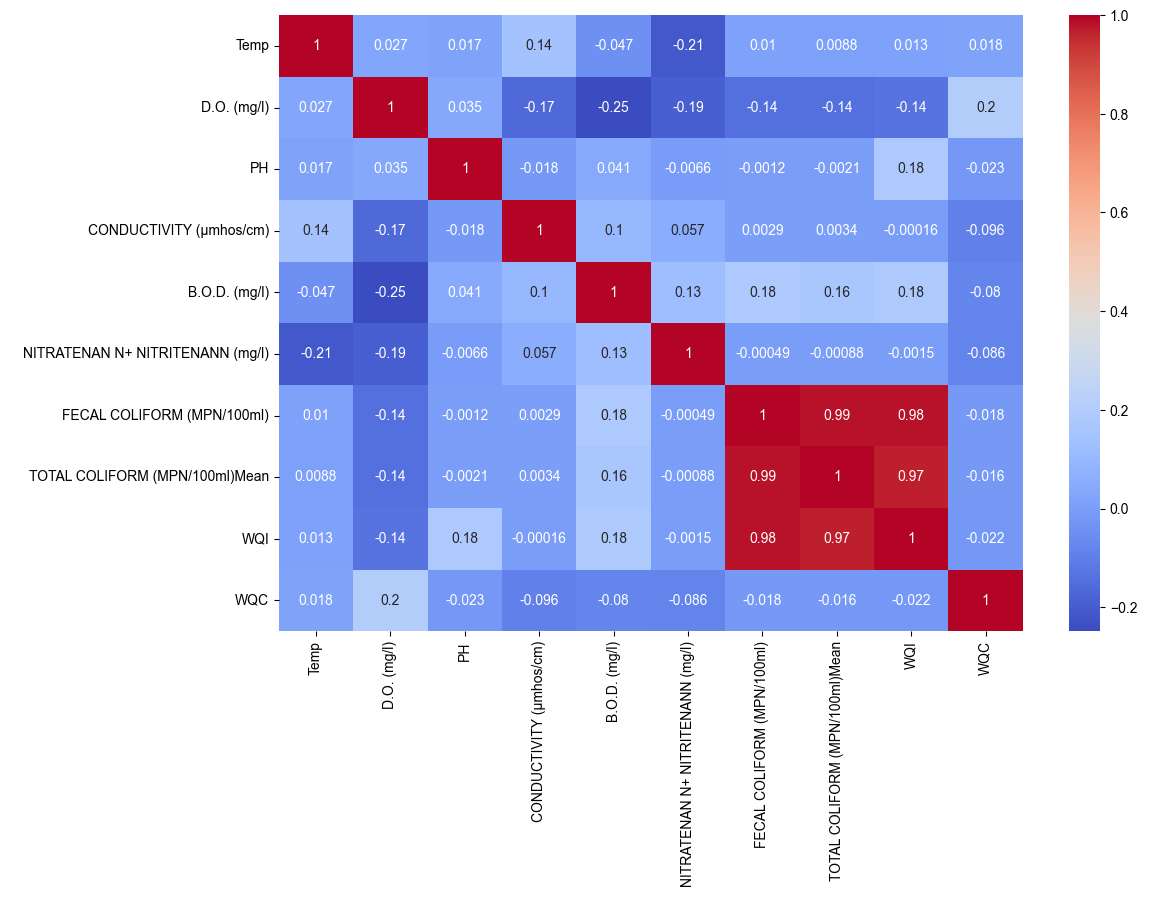

In [20]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
sns.set(font_scale=1.5)

<AxesSubplot: xlabel='WQC', ylabel='count'>

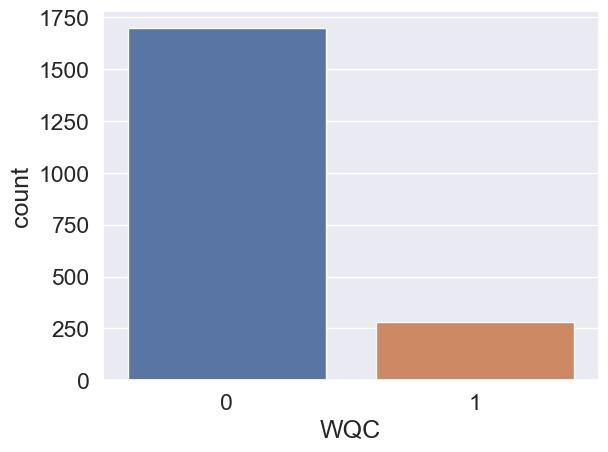

In [21]:
sns.countplot(x="WQC",data=df_wqi)

In [22]:
df_wqi["WQC"].value_counts()

0    1697
1     282
Name: WQC, dtype: int64

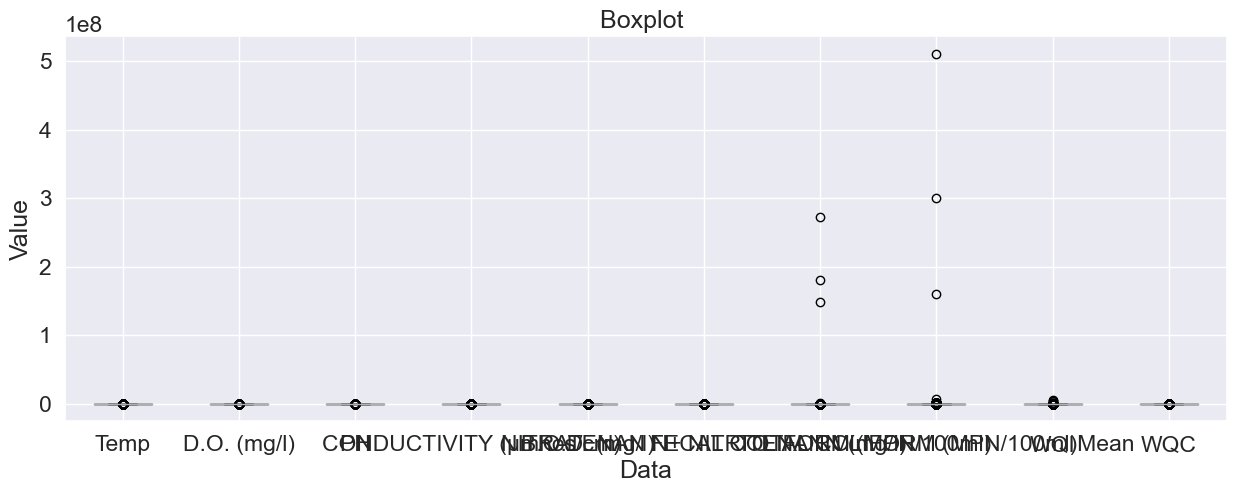

In [23]:
df_wqi.boxplot(figsize=(15,5))
plt.title('Boxplot ')
plt.xlabel('Data')
plt.ylabel('Value')
plt.show()
  

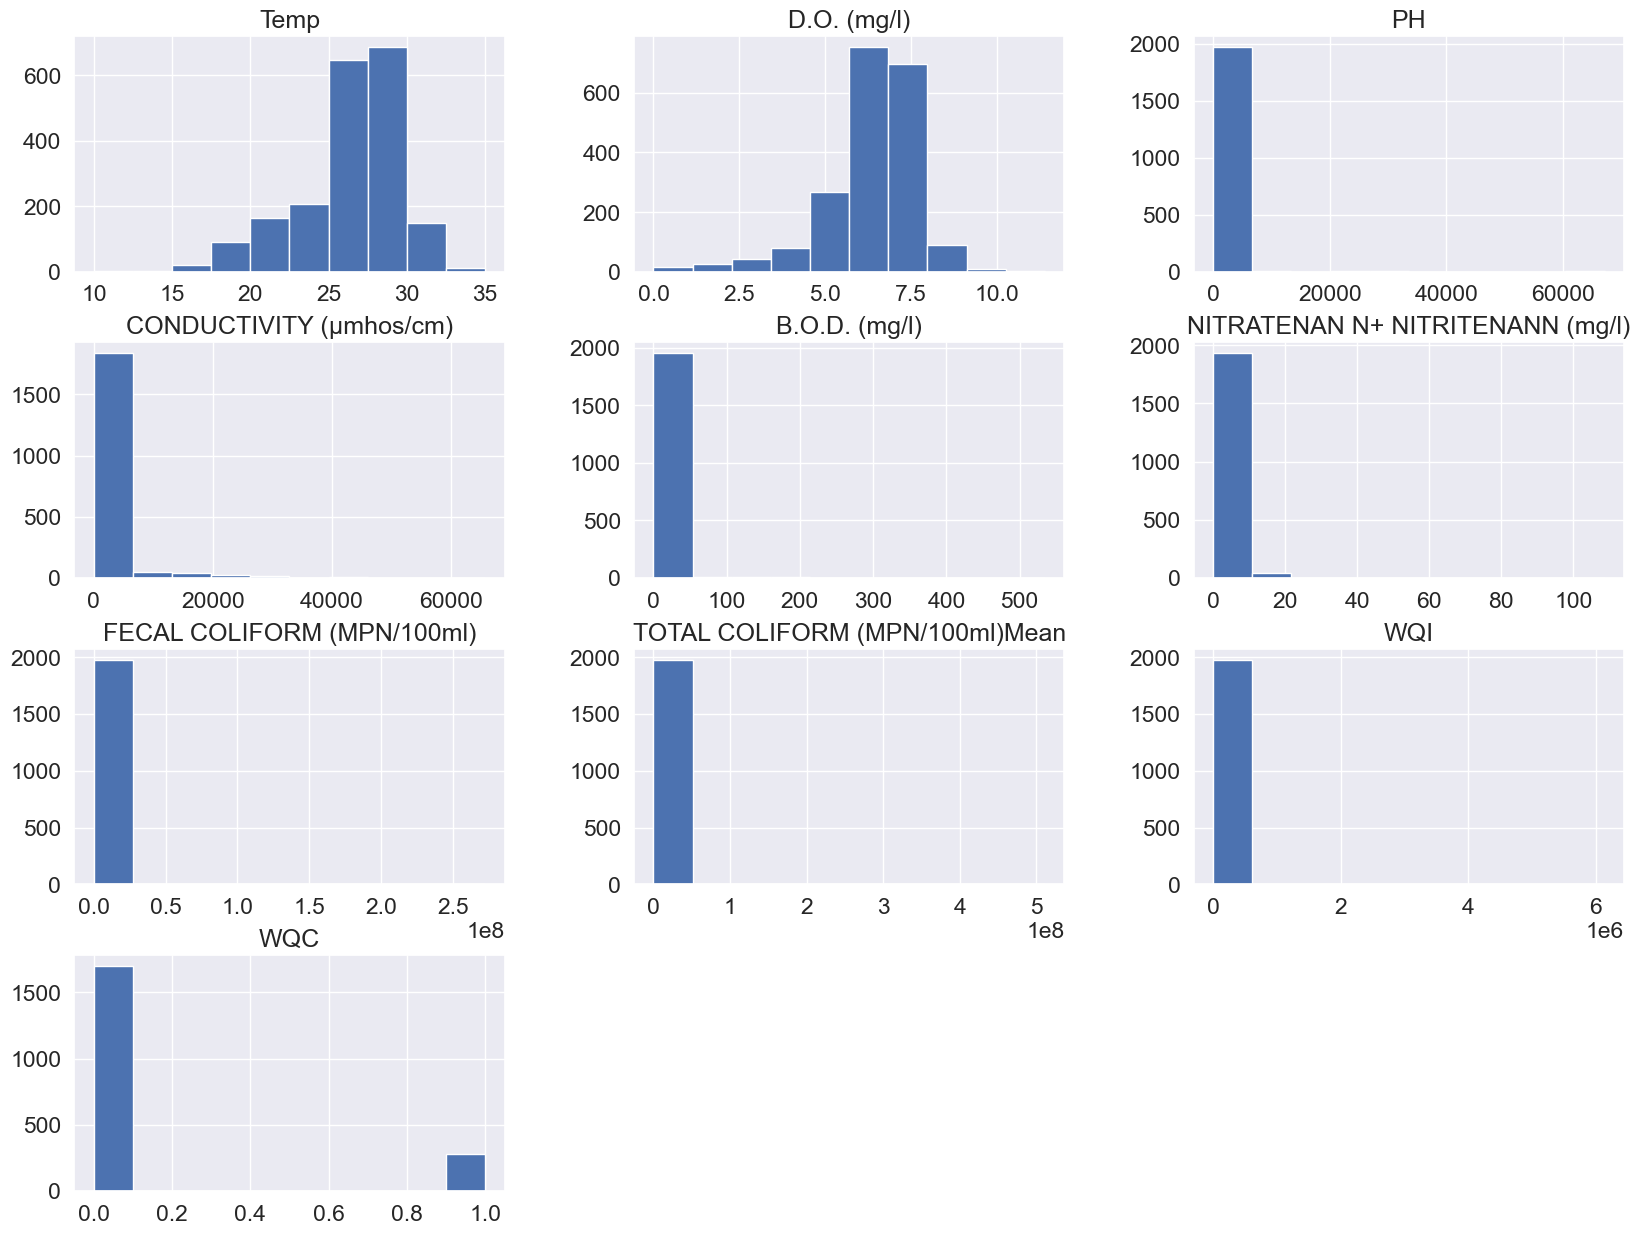

In [24]:
df_wqi.hist(figsize=(20,15))
plt.show()


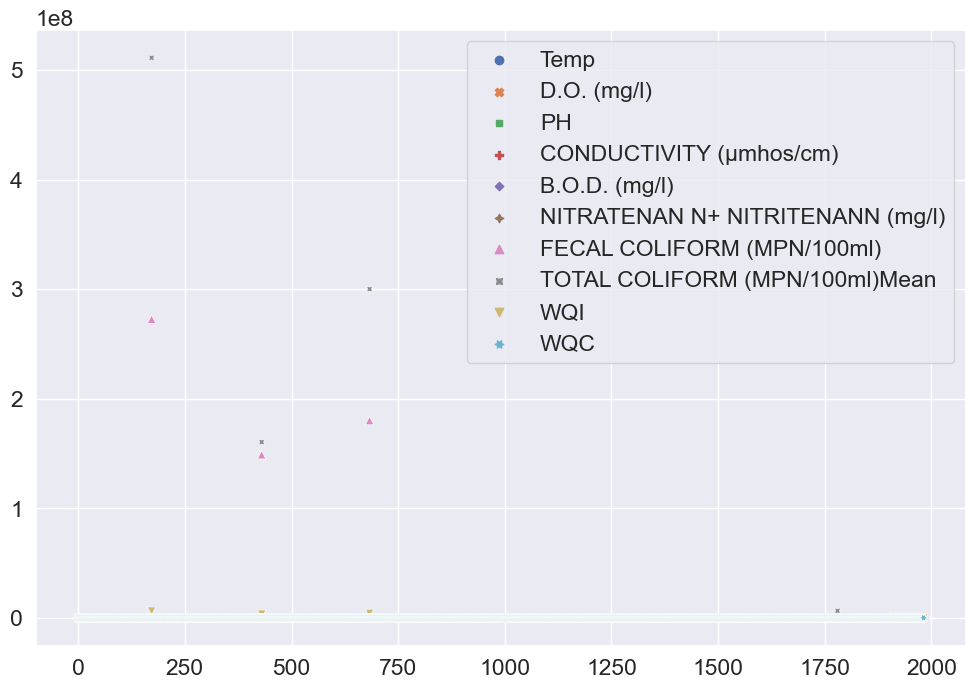

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(df_wqi)
plt.show()

In [26]:
# Assuming you have a DataFrame named 'data' with features/columns to be dropped

# Create a list of features/columns to be dropped
features_to_drop = ['STATION CODE', 'LOCATIONS', 'STATE']

# Drop the specified features/columns from the DataFrame
data = df_wqi.drop(features_to_drop, axis=1)



In [27]:
data.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,WQI,WQC
0,30.6,6.7,7.5,203.0,6.954217,0.1,11.0,27.0,108.549231,0
1,29.8,5.7,7.2,189.0,2.000000,0.2,4953.0,8391.0,175.363506,0
2,29.5,6.3,6.9,179.0,1.700000,0.1,3243.0,5330.0,126.135831,0
3,29.7,5.8,6.9,64.0,3.800000,0.5,5382.0,8443.0,195.105659,0
4,29.5,5.8,7.3,83.0,1.900000,0.4,3428.0,5500.0,141.393246,0


# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Separate features and target
X = data.drop('WQC', axis=1)
y = data['WQC']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)

(1325, 9)
(654, 9)


In [32]:
print(y_train.shape)
print(y_test.shape)

(1325,)
(654,)


# 1.Model-1: Support Vector Machine


In [33]:
from sklearn.svm import SVC

In [34]:
model = SVC()

In [35]:
model.fit(X_train,y_train)




SVC()

# Prediction and Evaluation

In [36]:
y_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import classification_report,confusion_matrix

<AxesSubplot: >

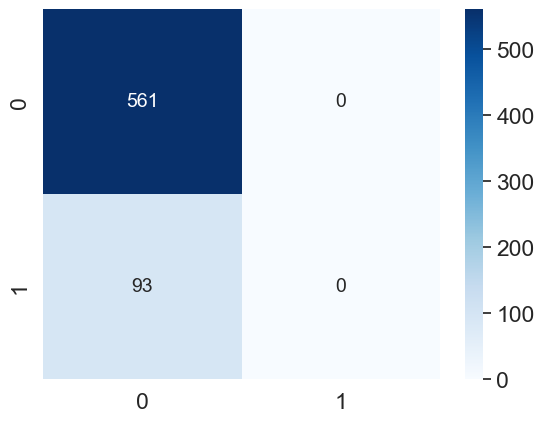

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', annot_kws={"fontsize": 14},fmt='g')

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       561
           1       0.00      0.00      0.00        93

    accuracy                           0.86       654
   macro avg       0.43      0.50      0.46       654
weighted avg       0.74      0.86      0.79       654



C:\Users\Sachin Panchal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sachin Panchal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sachin Panchal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

# Hyperparameter Tuning

In [40]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
grid = GridSearchCV(SVC(probability=True),param_grid, cv=5,refit=True,verbose=3)

In [43]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.860 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.860 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [44]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [45]:
grid.best_estimator_

SVC(C=100, gamma=0.0001, probability=True)

In [46]:
y_grid_pred = grid.predict(X_test)

<AxesSubplot: >

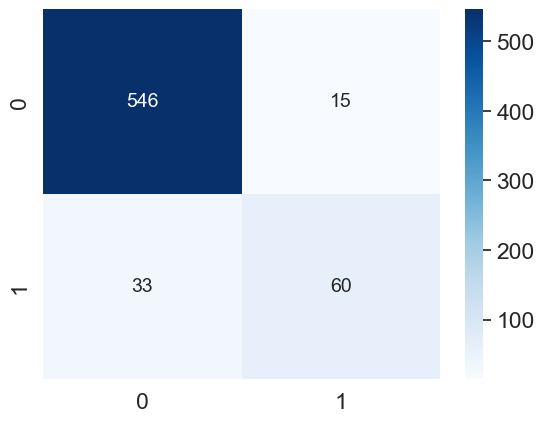

In [47]:
cm = confusion_matrix(y_test,y_grid_pred)
sns.heatmap(cm, annot=True, cmap='Blues', annot_kws={"fontsize": 14},fmt='g')

In [48]:
print(classification_report(y_test,y_grid_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       561
           1       0.80      0.65      0.71        93

    accuracy                           0.93       654
   macro avg       0.87      0.81      0.84       654
weighted avg       0.92      0.93      0.92       654



In [49]:
from sklearn.metrics import accuracy_score

y_grid_pred = grid.predict(X_test)
SVM_accuracy = accuracy_score(y_test, y_grid_pred)
print("svm_Accuracy:", SVM_accuracy)
   

svm_Accuracy: 0.926605504587156


# ROC Curve

In [50]:
from sklearn.metrics import roc_curve, auc

In [51]:
y_score = grid.predict_proba(X_test)[:, 1]

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

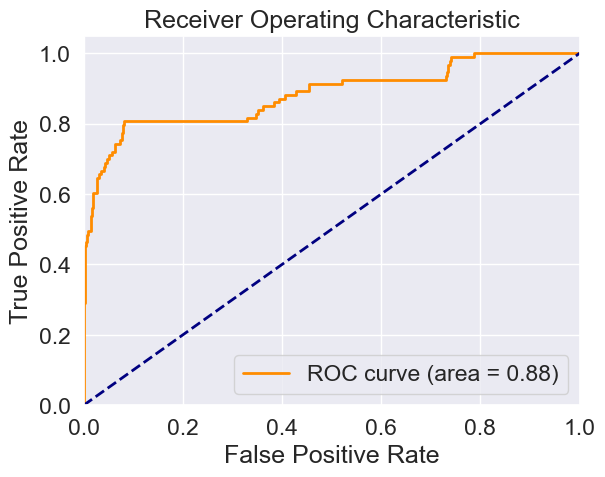

In [54]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve

In [55]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [56]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [57]:
average_precision = average_precision_score(y_test, y_score)

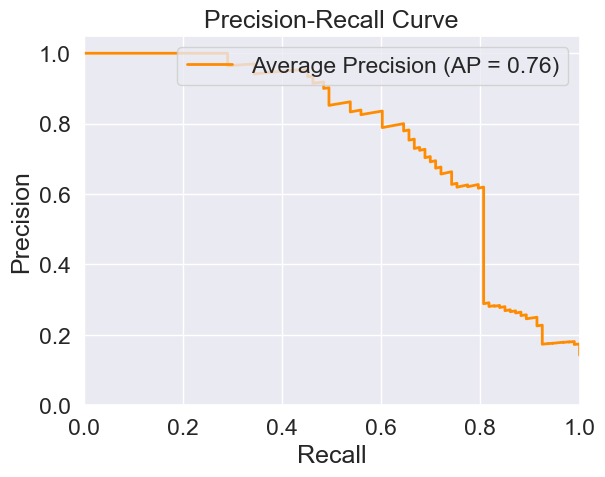

In [58]:
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Average Precision (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

# MODEL-2: Knn Model

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prediction and Evaluation

In [60]:
for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(i,"Accuracy:", accuracy)
   



2 Accuracy: 0.8883792048929664
3 Accuracy: 0.8960244648318043
4 Accuracy: 0.8853211009174312
5 Accuracy: 0.8899082568807339
6 Accuracy: 0.8837920489296636
7 Accuracy: 0.8899082568807339
8 Accuracy: 0.8868501529051988
9 Accuracy: 0.8883792048929664


In [61]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("knn_accuracy:", knn_accuracy)


knn_accuracy: 0.8960244648318043


# MODEL-3: Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression



In [63]:
logreg = LogisticRegression()


In [64]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [65]:
logreg.fit(X_train,y_train)

C:\Users\Sachin Panchal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Prediction and Evaluation

In [66]:
y_pr = logreg.predict_proba(X_test)
y_pred_025 = (y_pr[:,1] >= 0.25).astype(int)
y_pred_050 = (y_pr[:,1] >= 0.5).astype(int)
y_pred_075 = (y_pr[:,1] >= 0.75).astype(int)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(classification_report(y_test,y_pred_025))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.93      0.96      0.94        93

    accuracy                           0.98       654
   macro avg       0.96      0.97      0.97       654
weighted avg       0.98      0.98      0.98       654



In [69]:
print(classification_report(y_test,y_pred_050))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       561
           1       0.98      0.91      0.94        93

    accuracy                           0.98       654
   macro avg       0.98      0.96      0.97       654
weighted avg       0.98      0.98      0.98       654



In [70]:
print(classification_report(y_test,y_pred_075))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       561
           1       0.99      0.76      0.86        93

    accuracy                           0.96       654
   macro avg       0.97      0.88      0.92       654
weighted avg       0.97      0.96      0.96       654



In [71]:
# Beta values of the model
beta_0 = logreg.intercept_[0]
beta_1 = logreg.coef_[0][0]
print("beta_0 =", beta_0)
print("beta_1 =", beta_1)

beta_0 = 0.2006952000129028
beta_1 = 0.5287624552385584


In [72]:
cm25 = confusion_matrix(y_test, y_pred_025)
cm50 = confusion_matrix(y_test, y_pred_050)
cm75 = confusion_matrix(y_test, y_pred_075)

<AxesSubplot: >

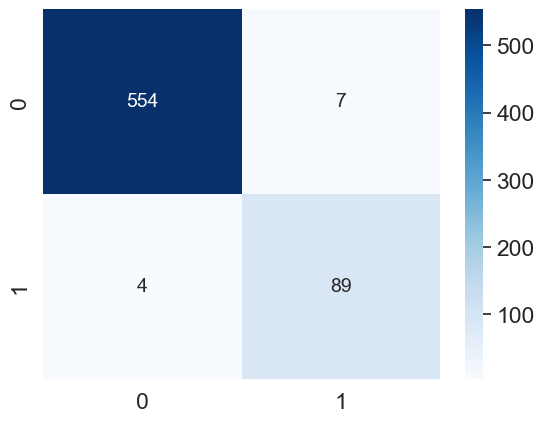

In [73]:
sns.heatmap(cm25, annot=True, cmap='Blues', annot_kws={"fontsize": 14},fmt='g')

<AxesSubplot: >

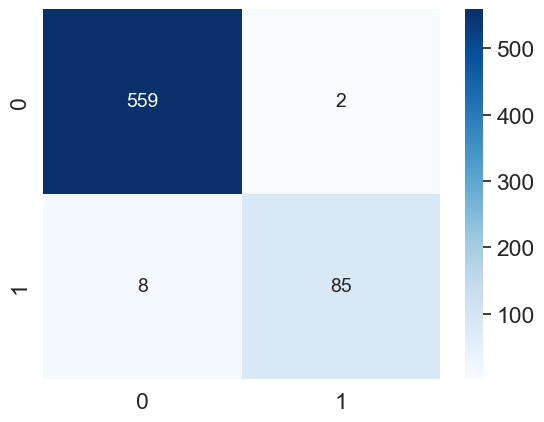

In [74]:
sns.heatmap(cm50, annot=True, cmap='Blues', annot_kws={"fontsize": 14},fmt='g')

<AxesSubplot: >

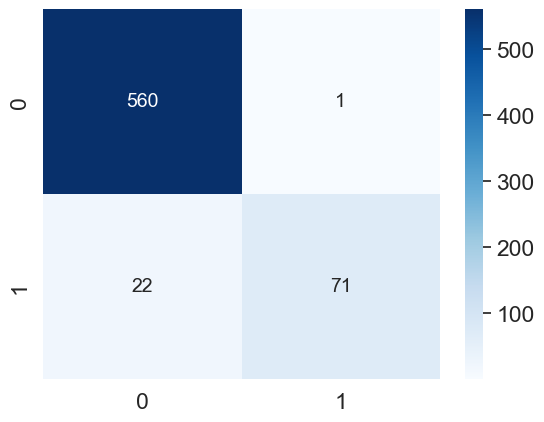

In [75]:
sns.heatmap(cm75, annot=True, cmap='Blues', annot_kws={"fontsize": 14},fmt='g')

In [76]:
from sklearn.metrics import accuracy_score
y_pr = logreg.predict_proba(X_test)
logreg_accuracy = accuracy_score(y_test,y_pred_025)
print("logreg_Accuracy:",logreg_accuracy)


logreg_Accuracy: 0.9831804281345565


# Accuracy Visulaization of three Models

In [77]:
import pandas as pd

# Sample data variables
Models = ['logreg_Accuracy','knn_Accuracy','SVM_Accuracy']
Accuracy = [logreg_accuracy,knn_accuracy,SVM_accuracy]


# Create a DataFrame
df = pd.DataFrame({'Models': Models, 'Accuracy': Accuracy,})

# Print the DataFrame
print(df)


            Models  Accuracy
0  logreg_Accuracy  0.983180
1     knn_Accuracy  0.896024
2     SVM_Accuracy  0.926606


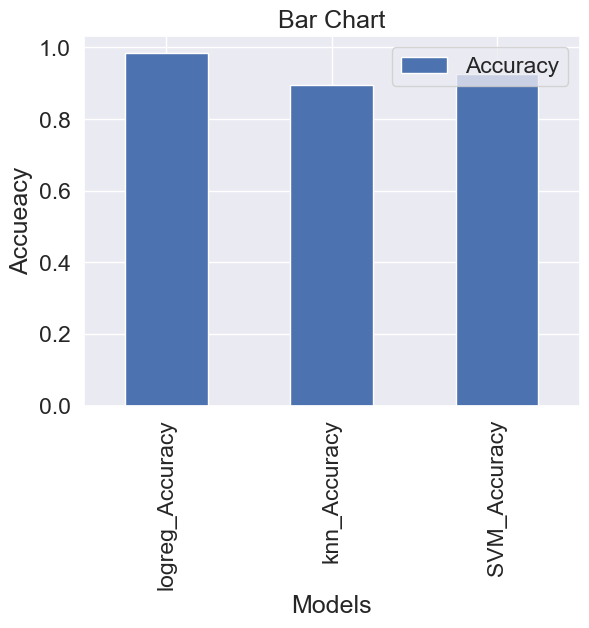

In [78]:

# Create a DataFrame
df = pd.DataFrame({'Models': Models, 'Accuracy': Accuracy,})

# Create a bar chart
df.plot.bar(x='Models', y='Accuracy')

# Set plot labels and title
plt.xlabel('Models')
plt.ylabel('Accueacy')
plt.title('Bar Chart')

# Display the plot
plt.show()


 Base on the Accuracy of above three model,best fit model is logistic regression for given Problem.